<a href="https://colab.research.google.com/github/Leraniki/ML_uni/blob/main/HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание задачи

Задача заключается в построении модели машинного обучения для бинарной классификации. Необходимо на основе набора медицинских и демографических данных о пациентах предсказать наличие у них диабета. Целевой переменной является столбец `diabetes`, где `1` означает наличие диабета, а `0` — его отсутствие.

## Чтение данных

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/diabetes_dataset.csv')

In [4]:
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


## Визуализация и характеристики

Был проведен всесторонний исследовательский анализ данных (EDA):
*   **Основные статистики:** С помощью `df.describe()` были вычислены среднее, стандартное отклонение, медиана и другие характеристики для числовых признаков. Анализ показал, что распределение по расам выглядит искусственно сбалансированным, а средний возраст пациента составляет около 42 лет.
*   **Дисбаланс классов:** Анализ целевой переменной `df['diabetes'].value_counts()` выявил сильный дисбаланс: 91 500 записей для класса "нет диабета" (0) и всего 8 500 для класса "есть диабет" (1). Это ключевая особенность задачи, которую необходимо было учесть при обучении моделей.
*   **Корреляционный анализ:** Была построена тепловая карта корреляций для числовых признаков. Она показала, что столбцы `year` и признаки, связанные с расой (`race:*`), имеют очень низкую корреляцию с целевой переменной, что делает их малоинформативными для модели.
*   **Анализ категориальных признаков:**
    *   **Location:** Визуализация показала, что доля диабетиков практически одинакова во всех штатах, следовательно, этот признак не несет предсказательной ценности.
    *   **Gender:** График показал, что доля диабетиков среди мужчин немного выше, чем среди женщин, что делает этот признак полезным.
    *   **Smoking_history:** Было выявлено, что у бывших и нынешних курильщиков доля диабета выше, чем у тех, кто никогда не курил, что также указывает на важность этого признака.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

Категориальные признаки: `gender, location, smoking_history`

In [ ]:
df.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


1. **Качество данных:** Данные полные, без пропусков.
2. **Происхождение данных:** Распределение по расам и годам сильно намекает на то, что данные не являются случайной выборкой из реальной популяции. Вероятнее всего, они синтетические или были подвергнуты значительной обработке и балансировке.
4. **Характеристика популяции:** Среднестатистический пациент в этой выборке — это человек среднего возраста (~42 года) с избыточным весом (BMI ~27), у которого показатели сахара в крови (HbA1c, blood_glucose_level) находятся на границе нормы и преддиабета.


In [ ]:
df['diabetes'].value_counts()

,count
diabetes,
0,91500
1,8500


**Сильный дисбаланс классов:** Мы видим, что пациентов без диабета гораздо больше, чем с диабетом. Модель, обученная на таких данных, может научиться всегда предсказывать "Нет диабета" и иметь высокую точность (accuracy), но при этом будет бесполезной.

### Корреляция

In [10]:
cat_features = df.select_dtypes(include = object).columns
cat_features

Index(['gender', 'smoking_history'], dtype='object')

In [6]:
num_cols = df.select_dtypes(include = np.number).columns

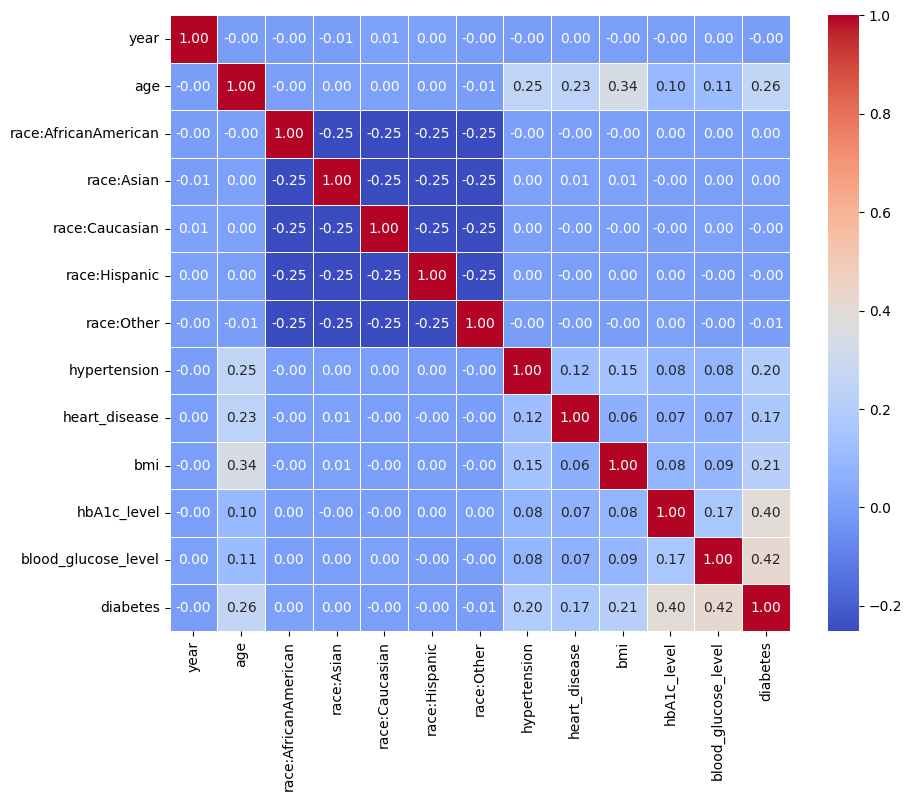

In [5]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot = True, fmt= '.2f', cmap='coolwarm', linewidths=.5)
plt.show()

Проверка на мультиколлинеарность:

In [6]:
def get_pairs(df):
  pairs = set()
  cols = df.columns
  for i in range(df.shape[1]):
    for j in range(i+1):
      pairs.add((cols[i], cols[j]))
  return pairs

In [7]:
def get_top_corr(df, top = 5):
  au_corr = df.corr().abs().unstack()
  labels = get_pairs(df)
  au_corr = au_corr.drop(labels = labels).sort_values(ascending = False)
  return au_corr[0:top]

In [15]:
get_top_corr(df[num_cols])

blood_glucose_level   diabetes      0.419558
hbA1c_level           diabetes      0.400660
age                   bmi           0.337396
                      diabetes      0.258008
race:AfricanAmerican  race:Asian    0.251859
dtype: float64

Из матрицы получаем, что year, race не влияют на таргетную переменную.

### Категориальные признаки

<Figure size 1000x600 with 0 Axes>

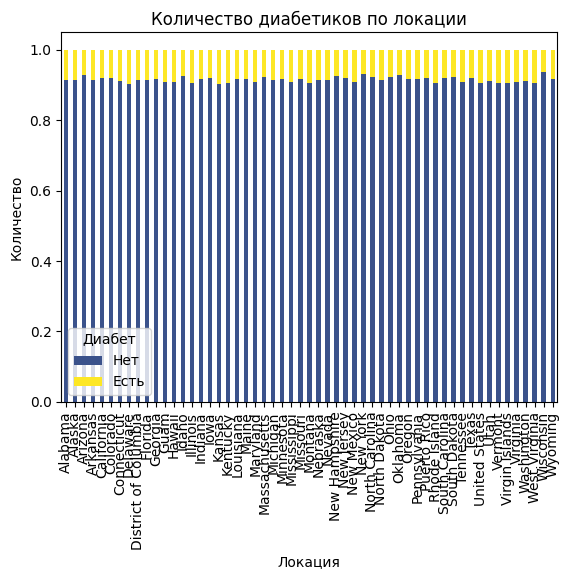

In [ ]:
plt.figure(figsize=(10, 6))
location_props = pd.crosstab(df['location'], df['diabetes'], normalize='index')
location_props.plot(kind='bar',
                    stacked=True,
                    color=['#3b528b', '#fde725'])
plt.title('Количество диабетиков по локации')
plt.xlabel('Локация')
plt.ylabel('Количество')
plt.legend(title='Диабет', labels=['Нет', 'Есть'])
plt.show()

Граница между синей и желтой областями проходит практически по прямой горизонтальной линии через весь график. Это означает, что доля людей с диабетом практически одинакова во всех локациях. Она колеблется в очень узком диапазоне.

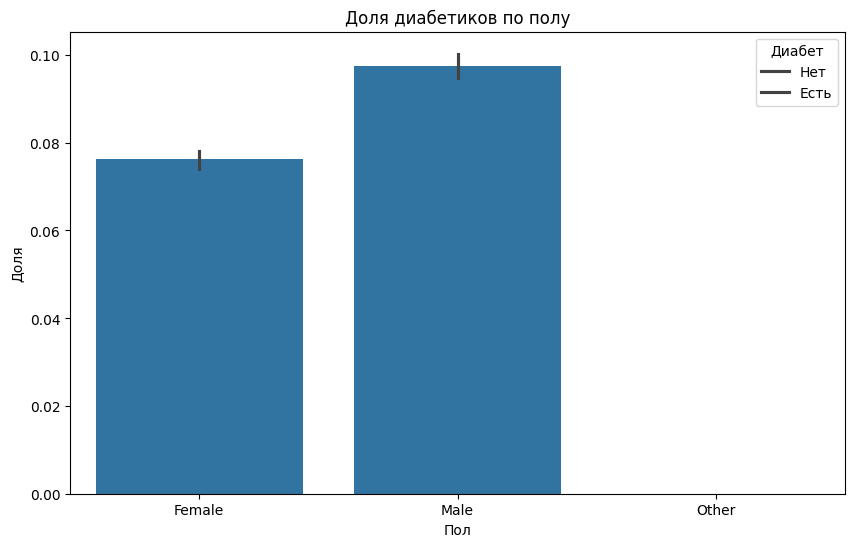

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x = df['gender'], y = Y)
plt.title('Доля диабетиков по полу')
plt.xlabel('Пол')
plt.ylabel('Доля')
plt.legend(title='Диабет', labels=['Нет', 'Есть'])
plt.show()

Доля диабетиков среди мужчин выше, чем среди женщин. Это означает, что этот признак важен.

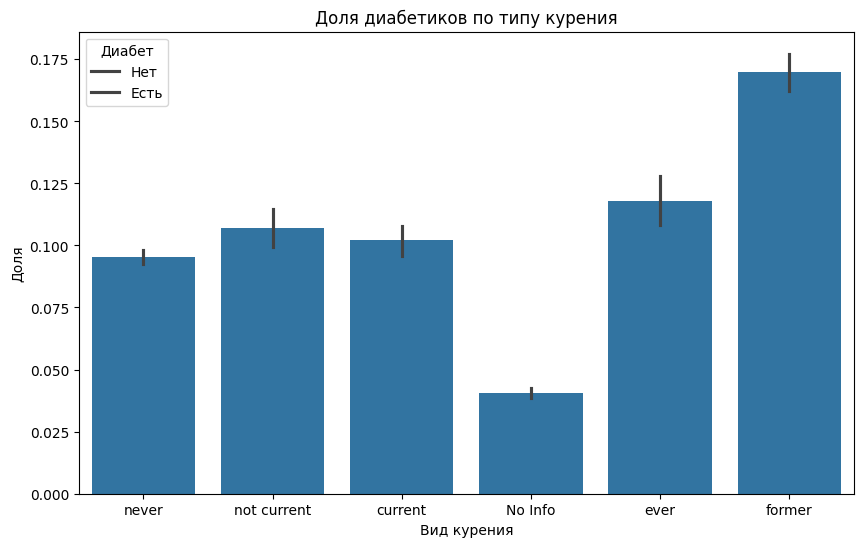

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x = df['smoking_history'], y = Y)
plt.title('Доля диабетиков по типу курения')
plt.xlabel('Вид курения')
plt.ylabel('Доля')
plt.legend(title='Диабет', labels=['Нет', 'Есть'])
plt.show()


Аналогично получаем, что курение влиет на таргетную переменную.

## Обработка категориальных признаков + Разбиение на выборки + Проведение нормализации

Разделяем на тестовую и тренировочную выборки

На основе анализа из пункта 3 были предприняты следующие шаги:
Удаление неинформативных признаков:
* Столбцы `year`, `race:*` и `location` были удалены из датафрейма.
* Преобразование `smoking_history`, `gender`: К столбцам было применено `One-Hot Encoding`, чтобы преобразовать их в числовой формат, понятный для моделей.

**age:** Диапазон примерно от 0 до 80.

**blood_glucose_level:** Диапазон примерно от 80 до 300.

**bmi:** Диапазон примерно от 10 до 95.

Эти признаки имеют совершенно разные масштабы. Поэтому необходимо провести нормализацию

In [7]:
df = df.drop(['year', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other', 'location'], axis = 1)

In [8]:
X = df.drop(['diabetes'], axis = 1)
Y = df['diabetes']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

Воспользуемся трансформером для удобной обработки категориальных признаков

In [11]:
!pip install category_encoders

In [12]:
num_cols = X_train.select_dtypes(include = np.number).columns

In [13]:
ind_cat_cols = [list(X_train.columns).index(col) for col in cat_features]
ind_num_cols = [list(X_train.columns).index(col) for col in num_cols]

In [14]:
from sklearn.preprocessing import StandardScaler
from category_encoders.one_hot import OneHotEncoder
from sklearn.compose import ColumnTransformer

t = [
    ('OHE', OneHotEncoder(), ind_cat_cols),
    ('scaler', StandardScaler(), ind_num_cols)
]

col_transf = ColumnTransformer(transformers = t)

# Обучение

## Борьба с несбалансированностью классов

Проблема дисбаланса классов была решена с помощью встроенного механизма взвешивания классов в обеих моделях (`class_weight='balanced'` для `LogisticRegression` и `auto_class_weights='Balanced'` для `CatBoost`). Этот подход автоматически назначает более высокий вес ошибкам на редком классе (диабет), заставляя модель уделять ему больше внимания.

### Логистическая регрессия

Выбрана как простой, быстрый и хорошо интерпретируемый базовый метод для задач классификации.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('transformer', col_transf),
    ('LR', LogisticRegression(class_weight = 'balanced'))
])

pipe.fit(X_train, Y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('OHE', OneHotEncoder(),
                                                  [0, 4]),
                                                 ('scaler', StandardScaler(),
                                                  [1, 2, 3, 5, 6, 7])])),
                ('LR', LogisticRegression(class_weight='balanced'))])

Посмотрим на ошибку модели

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

predict_train = pipe.predict(X_train)

print(classification_report(Y_train, predict_train))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     73203
           1       0.42      0.89      0.57      6797

    accuracy                           0.89     80000
   macro avg       0.71      0.89      0.75     80000
weighted avg       0.94      0.89      0.90     80000



In [37]:
predict_test = pipe.predict(X_test)
print(classification_report(Y_test, predict_test))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18297
           1       0.43      0.87      0.57      1703

    accuracy                           0.89     20000
   macro avg       0.71      0.88      0.75     20000
weighted avg       0.94      0.89      0.91     20000



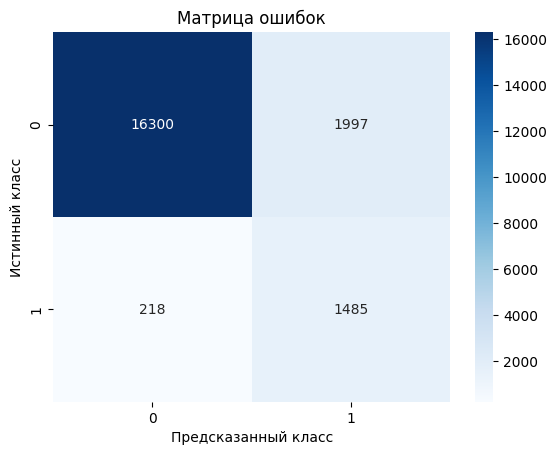

In [38]:
cm = confusion_matrix(Y_test, predict_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.show()

Модель эффективно выявляет большинство пациентов с диабетом (recall=87%), но делает это ценой большого количества ложных тревог (precision=43%). Она очень надежна, когда говорит, что диабета нет, но ее диагнозу "диабет есть" можно доверять лишь в половине случаев.

### Градиентный бустинг (CatBoost)

 Выбран как более продвинутый и мощный алгоритм градиентного бустинга, который известен своей высокой точностью на табличных данных и способностью эффективно работать с категориальными признаками.

In [39]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.5 MB/s eta 0:00:00


In [40]:
from catboost import CatBoostClassifier

cat_features = ['gender', 'smoking_history']

model_cat = CatBoostClassifier(
    iterations = 100,
    auto_class_weights='Balanced',
    random_seed=42,
    verbose = 0,
    cat_features=cat_features
)
model_cat.fit(X_train, Y_train)

predict_train_cat = model_cat.predict(X_train)

In [42]:
print(classification_report(Y_train, predict_train_cat))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     73203
           1       0.50      0.94      0.66      6797

    accuracy                           0.92     80000
   macro avg       0.75      0.93      0.80     80000
weighted avg       0.95      0.92      0.93     80000



In [43]:
predict_test_cat = model_cat.predict(X_test)
print(classification_report(Y_test, predict_test_cat))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     18297
           1       0.49      0.91      0.64      1703

    accuracy                           0.91     20000
   macro avg       0.74      0.91      0.79     20000
weighted avg       0.95      0.91      0.92     20000



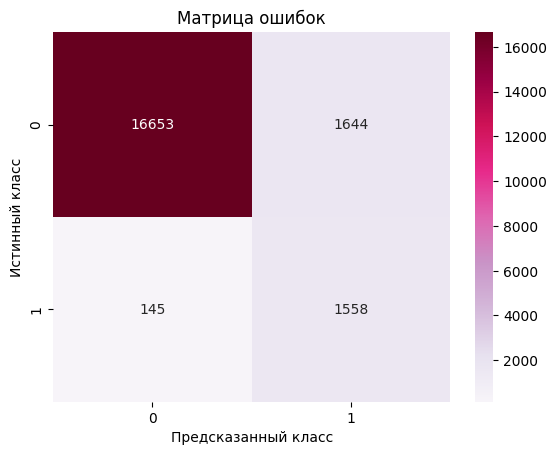

In [44]:
cm = confusion_matrix(Y_test, predict_test_cat)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuRd')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.show()

Модель CatBoost является явным улучшением по сравнению с логистической регрессией. Она сохраняет ту же превосходную способность находить больных диабетом (recall=91%), но при этом значительно улучшает общий баланс метрик (f1-score и accuracy).
Хотя проблема с большим количеством "ложных тревог" остаётся, CatBoost делает это немного реже, что делает её более эффективной и надёжной моделью для данной задачи.

Accuracy = 0.91: модель стала в целом точнее, правильно классифицируя 91% всех пациентов (было 88%).

Precision = 0.49: Здесь есть небольшое улучшение. Теперь, когда модель говорит "диабет есть", она права в 49% случаев (вместо 43%). Это означает чуть меньше ненужных повторных обследований для здоровых людей.

F1-score = 0.93: F1-score вырос с 0.91 до 0.93, что говорит о том, что CatBoost нашел более оптимальный компромисс между поиском всех больных и минимизацией ложных тревог.

## Вывод

В ходе работы была успешно решена задача прогнозирования диабета на основе клинических данных. Ключевой особенностью проекта была работа с **сильно несбалансированной выборкой**, где главной целью стало **максимальное выявление пациентов с диабетом (`recall`)**.

После тщательной очистки, анализа и подготовки данных были сравнены две модели:

1.  **Логистическая регрессия** показала себя как хороший базовый "скрининговый" инструмент, находящий **87%** больных.
2.  **CatBoost** оказался **значительно эффективнее**: он не только находит еще больше больных, но и делает это с **меньшим количеством ложных тревог**, что делает его более сбалансированной и точной моделью.

**Итоговая рекомендация:** Использовать **модель CatBoost** как эффективный **инструмент для первичного скрининга**, который надежно выявляет группу риска для дальнейшего обследования, минимизируя шанс пропустить заболевание.

# Кластеризация

### KMeans

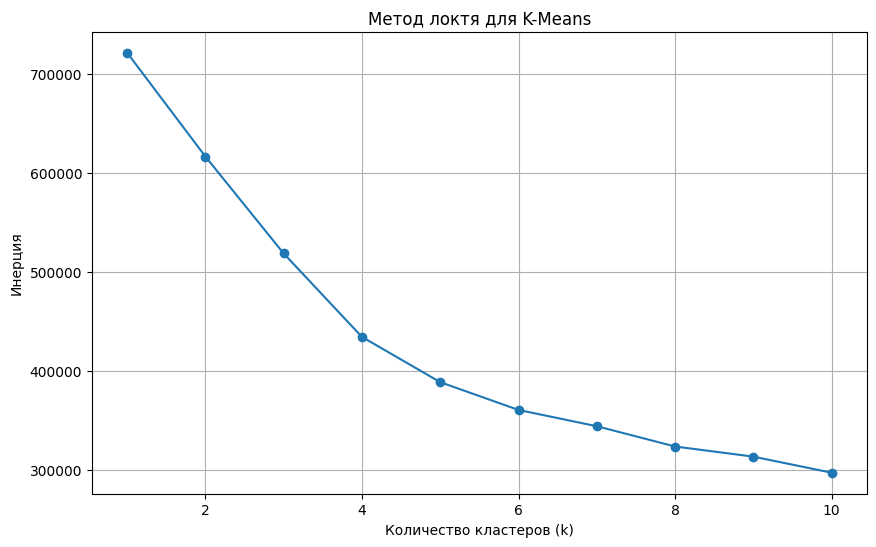

In [17]:
from sklearn.cluster import KMeans, DBSCAN, MeanShift

X_prepared = col_transf.fit_transform(X)

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_prepared)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Метод локтя для K-Means')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Инерция')
plt.grid(True)
plt.show()

In [18]:
pipe_km = Pipeline([
    ('transformer', col_transf),
    ('model', KMeans(n_clusters = 4, random_state=42))
])
pipe_km.fit(X)


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('OHE', OneHotEncoder(),
                                                  [0, 4]),
                                                 ('scaler', StandardScaler(),
                                                  [1, 2, 3, 5, 6, 7])])),
                ('model', KMeans(n_clusters=4, random_state=42))])

In [19]:
df['kmeans_cluster'] = pipe_km.named_steps['model'].labels_
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,kmeans_cluster
0,Female,32.0,0,0,never,27.32,5.0,100,0,1
1,Female,29.0,0,0,never,19.95,5.0,90,0,1
2,Male,18.0,0,0,never,23.76,4.8,160,0,1
3,Male,41.0,0,0,never,27.32,4.0,159,0,0
4,Female,52.0,0,0,never,23.75,6.5,90,0,0
...,...,...,...,...,...,...,...,...,...,...
99995,Female,33.0,0,0,never,21.21,6.5,90,0,1
99996,Female,80.0,0,0,No Info,36.66,5.7,100,0,0
99997,Male,46.0,0,0,ever,36.12,6.2,158,0,0
99998,Female,51.0,0,0,not current,29.29,6.0,155,0,0


## DBSCAN

In [20]:
num_cols = X.select_dtypes(include=np.number).columns

In [22]:
pipe_dbscan = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DBSCAN(eps=0.5, min_samples=15))
])
pipe_dbscan.fit(X[num_cols])

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', DBSCAN(min_samples=15))])

In [23]:
df['dbscan_cluster'] = pipe_dbscan.named_steps['model'].labels_

## Mean Shift

Оцениваем bandwidth на сэмпле для ускорения

In [25]:
from sklearn.cluster import estimate_bandwidth

sample_for_bw = X_prepared[np.random.choice(X.shape[0], 10000, replace=False)]
bandwidth = estimate_bandwidth(sample_for_bw, quantile=0.2)

In [26]:
pipe_msh = Pipeline([
    ('transformer', col_transf),
    ('model', MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=-1))
])
pipe_msh.fit(X)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('OHE', OneHotEncoder(),
                                                  [0, 4]),
                                                 ('scaler', StandardScaler(),
                                                  [1, 2, 3, 5, 6, 7])])),
                ('model',
                 MeanShift(bandwidth=np.float64(2.7282090897196833),
                           bin_seeding=True, n_jobs=-1))])

In [28]:
df['meanshift_cluster'] = pipe_msh.named_steps['model'].labels_

### Визуализация с помощью PCA

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
PCA_df = pca.fit_transform(X[num_cols])
PCA_df = pd.DataFrame(PCA_df, columns=['PCA_1', 'PCA_2'])

PCA_df.head()

,PCA_1,PCA_2
0,-38.775778,-6.395162
1,-49.130793,-9.239961
2,19.686291,-25.993236
3,20.772471,-2.754060
4,-47.034061,13.943244


In [31]:
first_comp_corr = X[num_cols].corrwith(PCA_df.PCA_1)
second_comp_corr = X[num_cols].corrwith(PCA_df.PCA_2)

corrs =pd.concat((first_comp_corr, second_comp_corr), axis = 1)
corrs.columns = ['PCA_1', 'PCA_2']

corrs

,PCA_1,PCA_2
age,0.159398,0.986789
hypertension,0.096472,0.240650
heart_disease,0.081089,0.222586
bmi,0.109911,0.351473
hbA1c_level,0.170862,0.076481
blood_glucose_level,0.998787,-0.049221


Таким образом мы видим, что в качестве главных компонент выбраны принаки `age`,  `blood_glucose_level`

In [33]:
PCA_df = pd.concat((PCA_df, df[['kmeans_cluster', 'dbscan_cluster', 'meanshift_cluster']]), axis = 1)

/tmp/ipython-input-4176718378.py:14: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


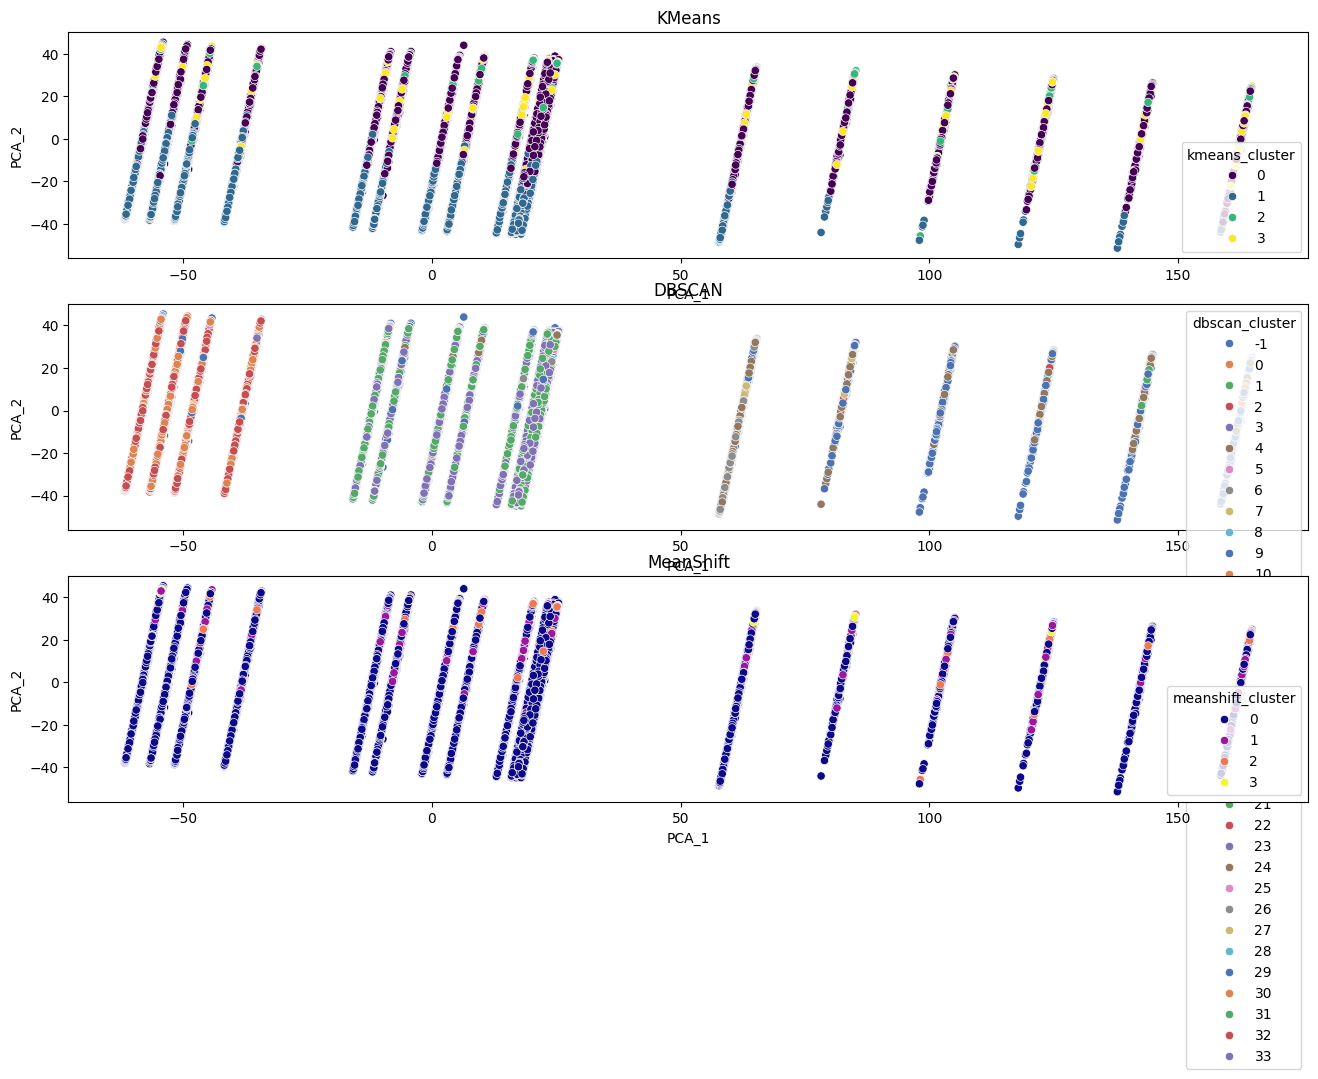

In [47]:
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(3,1,1)
ax1.set_title('KMeans')
sns.scatterplot(data=PCA_df, x ='PCA_1', y='PCA_2', hue = 'kmeans_cluster', palette='viridis')

ax2 = fig.add_subplot(3,1,2)
sns.scatterplot(data=PCA_df, x ='PCA_1', y='PCA_2', hue = 'dbscan_cluster', palette='deep')
ax2.set_title('DBSCAN')

ax3 = fig.add_subplot(3,1,3)
sns.scatterplot(data=PCA_df, x ='PCA_1', y='PCA_2', hue = 'meanshift_cluster', palette='plasma')
ax3.set_title('MeanShift')

plt.tight_layout()

plt.show()

###  Сравнение кластеров с реальными метками

Визуальный анализ

In [50]:
print(pd.crosstab(df['kmeans_cluster'], Y, normalize='index').round(3) * 100)

diabetes           0     1
kmeans_cluster            
0               89.6  10.4
1               99.5   0.5
2               67.9  32.1
3               73.7  26.3


In [51]:
print(pd.crosstab(df['dbscan_cluster'], Y, normalize='index').round(3) * 100)

diabetes            0      1
dbscan_cluster              
-1               36.9   63.1
 0              100.0    0.0
 1              100.0    0.0
 2              100.0    0.0
 3               93.3    6.7
 4               73.1   26.9
 5                0.0  100.0
 6              100.0    0.0
 7               62.3   37.7
 8              100.0    0.0
 9              100.0    0.0
 10             100.0    0.0
 11              74.3   25.7
 12             100.0    0.0
 13             100.0    0.0
 14              70.3   29.7
 15             100.0    0.0
 16               0.0  100.0
 17               0.0  100.0
 18              64.9   35.1
 19              68.9   31.1
 20               0.0  100.0
 21               0.0  100.0
 22               0.0  100.0
 23               0.0  100.0
 24             100.0    0.0
 25               0.0  100.0
 26              61.5   38.5
 27             100.0    0.0
 28               0.0  100.0
 29               0.0  100.0
 30               0.0  100.0
 31           

In [53]:
print(pd.crosstab(df['meanshift_cluster'], Y, normalize = 'index').round(3) * 100)

diabetes              0     1
meanshift_cluster            
0                  93.9   6.1
1                  73.7  26.3
2                  70.0  30.0
3                  60.9  39.1


Количественный анализ

In [54]:
from sklearn.metrics import adjusted_rand_score

no_noise_db = df['dbscan_cluster'] != -1
ari_db = adjusted_rand_score(Y[no_noise_db], df['dbscan_cluster'][no_noise_db])

metrics_data = {
    'KMeans': {
        'ARI': adjusted_rand_score(Y, df['kmeans_cluster'])
    },

    'DBSCAN':{
        'ARI' : ari_db
    },

    'Mean Shift':{
        'ARI': adjusted_rand_score(Y, df['meanshift_cluster'])
    }

}

metrics_df = pd.DataFrame(metrics_data).T
print(metrics_df.round(4))

               ARI
KMeans      0.0424
DBSCAN      0.0190
Mean Shift  0.2135


В ходе исследования были применены три алгоритма кластеризации: K-**Means**, **DBSCAN** и **Mean Shift**. Для оценки соответствия полученных кластеров целевой переменной (наличие диабета) использовался **Adjusted Rand Index (ARI)**.

Результаты показали, что алгоритм **Mean Shift** продемонстрировал наилучшую производительность (ARI = 0.2135), выявив структуру данных, которая в значительной степени коррелирует с реальным диагнозом. Алгоритмы **K-Means** (ARI = 0.0424) и **DBSCAN** (ARI = 0.0190) показали результаты, близкие к случайному разделению, что свидетельствует о их низкой эффективности для данной задачи.

Таким образом, для сегментации пациентов и выявления "групп риска" наиболее подходящим является алгоритм **Mean Shift**.